In [81]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib notebook

In [82]:
def get_data(data_path):
    files = sorted(glob.glob(data_path+'/*'))
    data = []
    for file in files:
        infile = open(file, 'rb')
        data.append(pickle.load(infile))
        infile.close()
    return data, files
def get_power(data_real, data_image=None):
    if data_image is not None:
        data = data_real+ 1.0j*data_image
    else:
        data = data_real
    return np.abs(np.fft.fft(data))**2

def get_fft(data_real, data_image=None):
    if data_image is None:
        return np.fft.fft(data_real)
    else:
        return np.fft.fft(data_real+1.0j*data_image)
    
    
    
def get_times_and_freqs(N, sample_rate):
    times = np.linspace(0, N/sample_rate, N)
    freqs = np.fft.fftfreq(len(times), np.mean(np.diff(times)))
    return times, freqs

In [83]:
path = '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/'
caps, cap_files     =  get_data(path+'captures')
args, arg_files     =  get_data(path+'args')
coords, coord_files =  get_data(path+'coordinates')
times, times_files  =  get_data(path+'times')
cap_files

['/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_4599500922_test_run',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_5599827315_upper_sb_1_421',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_5606779163_lower_sb_1_419',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_567849145_test_upper_sb_1_4205',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_571995824_s_cold',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_576254343_s_cal',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_5864892704_S',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458898_5886155795_s_cal']

In [85]:
#Choose the data set we want to play with
upper_sb = caps[1]
lower_sb = caps[2]
s_cold = caps[6]
s_cal   = caps[7]
# Organized in real and complex keys of a dict


In [86]:
#Get times and frequencies, need sample rate and number of samples.. look at args!
N = len(upper_sb['real'][0])
print(args[-2])


Namespace(alt=90.0, az=0.0, dec=None, divisor=1, lat=None, lat_loc=37.873199, long=None, nblocks=1, path='/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/', ra=None, volt_range='50mV')


In [87]:
N

15800

In [88]:
sample_rate = 62.5e6
times, freqs = get_times_and_freqs(N, sample_rate)

<IPython.core.display.Javascript object>


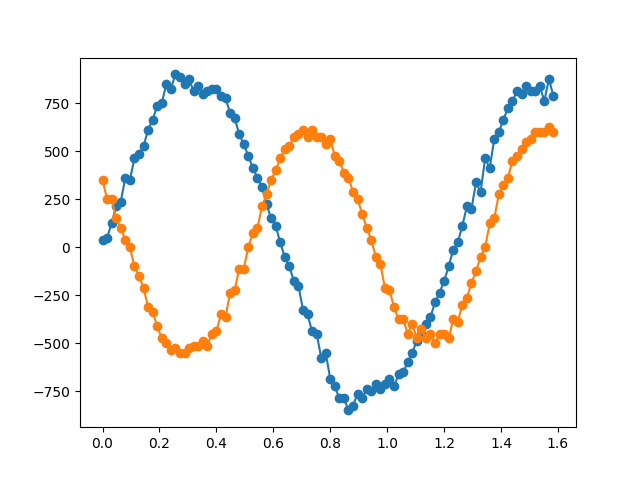

In [89]:
plt.figure()
plt.plot(times[:100]*1e6, upper_sb['real'][0][:100], 'o-')
plt.plot(times[:100]*1e6, lower_sb['real'][0][:100], 'o-')
plt.show()


In [90]:
upper_sb['real'][0]

array([ 37.53665689,  50.04887586, 125.12218964, ..., 513.00097752,
       437.92766373, 362.85434995])

In [91]:
#Find the power
power_usb = get_power(upper_sb['real'][0], upper_sb['imaginary'][0])
power_lsb = get_power(lower_sb['real'][0], lower_sb['imaginary'][0])

<IPython.core.display.Javascript object>


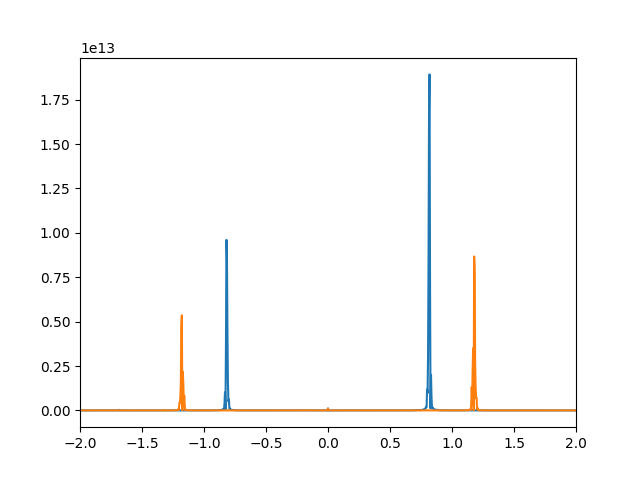

(-2, 2)

In [92]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_usb))
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_lsb))
plt.xlim(-2, 2)

In [94]:
power_s_cold = get_power(s_cold['real'][0], s_cold['imaginary'][0])
power_s_cal = get_power(s_cal['real'][0], s_cal['imaginary'][0])

<IPython.core.display.Javascript object>


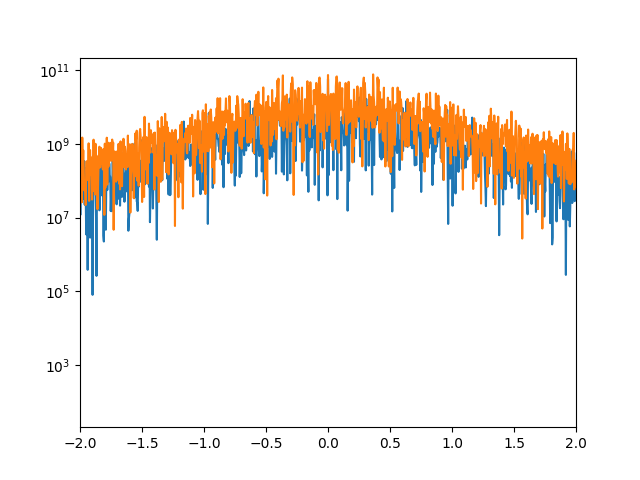

(-2, 2)

In [95]:
plt.figure()
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_s_cold))
plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_s_cal))

plt.xlim(-2, 2)

In [ ]:
s_line =